# Erosion
En este workbook vamos a implementar el método de erosión morfológica.

Primero importamos las librerías necesarias

In [54]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Después creamos una función que recibirá como parámetro la imagen a erosionar y la matriz que utiizaremos para definir cómo se hará la erosión.

In [55]:
def erosion(image, matrix):
  rows, cols = image.shape
  matrix_rows, matrix_cols = matrix.shape

  padded_image = np.pad(image, ((int(matrix_rows/2), int(matrix_rows/2)), (int(matrix_cols/2), int(matrix_cols/2))), 'constant')
  eroded_image = np.zeros_like(image)

  for i in range(rows):
    for j in range(cols):
        window = padded_image[i:i+matrix_rows, j:j+matrix_cols]
        min_value = np.min(np.multiply(window, matrix))
        eroded_image[i, j] = min_value
  return eroded_image




La matriz que se debe ser binaria de 3 x 3 en un formato similar a: 

1, 1, 1

1, 1, 1

1, 1, 1

In [92]:
matrix = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
], dtype=np.bool_)

Vamos a crear una funcion que reciba 2 imagenes y las despliegue lado a lado con un plt. Esta función la mandaremos llamar con distintos intentos que haremos más adelante

In [93]:
def muestra_imagenes (original_image, eroded_image):
  output = [original_image, eroded_image]
  titles = ['Original Image', 'Eroded Image']

  f, ax = plt.subplots(1,2, figsize=(15,8))

  for i in range(2):
      plt.subplot(1, 2, i + 1)
      plt.imshow(output[i], cmap='gray')
      plt.title(titles[i])
  plt.show()
  return

Ahora lo que haremos es cargar una imagen y aplicarle el método de erosión, usando la matríz que acabamos de crear

In [104]:
original_image = cv.imread("images/erosion_example1.png",0)

eroded_image = erosion(original_image, matrix)

Por último vamos a mostrar ambas imágenes

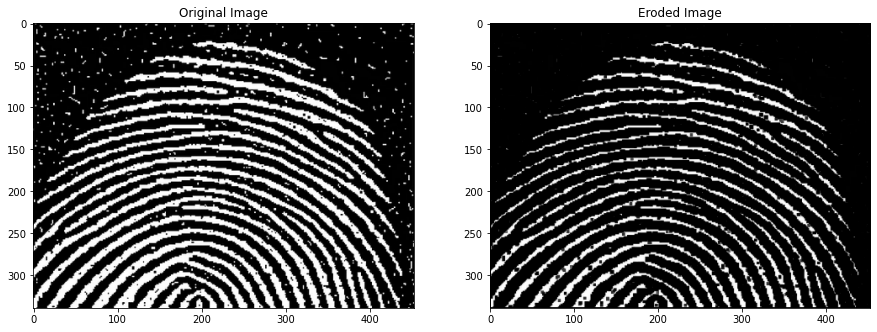

In [105]:
muestra_imagenes(original_image, eroded_image)


Usamos una matriz diferente para ver comparar sus efectos

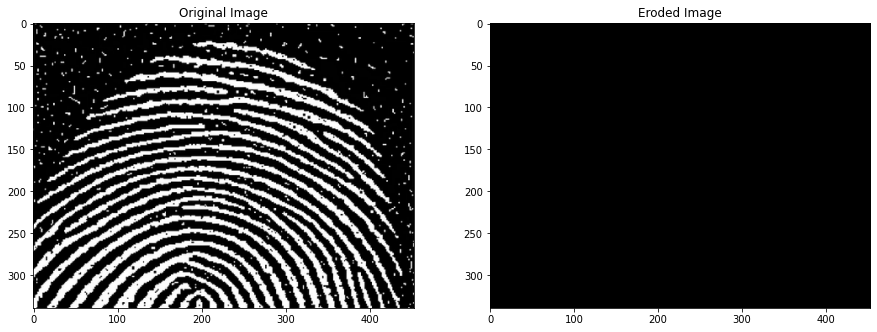

In [102]:
matrix = np.array([
    [1,1,1],
    [1,0,1],
    [1,1,1]
], dtype=np.bool_)

original_image = cv.imread("images/erosion_example1.png",0)

eroded_image = erosion(original_image, matrix)
muestra_imagenes(original_image, eroded_image)


Como podemos observar, esa matriz nos quitó todo el detalle blanco y la imagen es inservible.

Hacemos otro intento con la matriz original y otra imagen

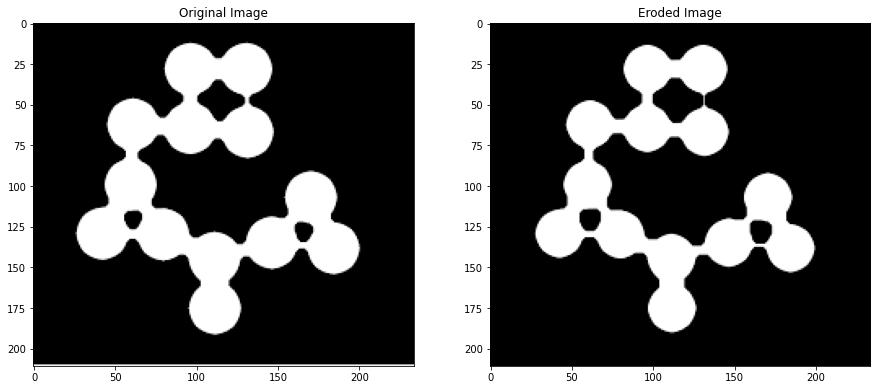

In [103]:
matrix = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
], dtype=np.bool_)

original_image = cv.imread("images/erosion_example2.png",0)

eroded_image = erosion(original_image, matrix)
muestra_imagenes(original_image, eroded_image)

Conclusión, la transformación morfológica de erosión nos permite remover ruido de la imagen, aunque también nos hace perder un poco de información de la imagen original. Sin embargo, utilizando el método de dilatación podemos recuperar parte de esa información que perdimos.

# Referencias
GeeksforGeeks. (2021). *Mahotas Element Structure for Eroding Image*. Recuperado el 3 de Febrero de 2023 de https://www.geeksforgeeks.org/mahotas-element-structure-for-eroding-image/

Chhikara, P. (2022). U*nderstanding Morphological Image Processing and Its Operations.* Medium. Recuperado el 3 de Febrero de 2023 de https://towardsdatascience.com/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756